<a href="https://colab.research.google.com/github/Konstantin-Solomin/Yandex-Practicum-Data-Science/blob/main/real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/real_estate/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


- Названия сменить:  
            - cityCenters_nearest              
 - Пропуски в: 
            - ceiling_height
            - floors_total
            - living_area
            - is_apartment
            - kitchen_area
            - balcony (можно заполнить нулями)
            - airports_nearest
            - cityCenters_nearest
            - parks_around3000
            - parks_nearest
            - ponds_around3000
            - ponds_nearest
            - days_exposition
 - Типы данных поменять:
             - first_day_exposition на datetime
             - is_apartment на bool
             - balcony на int
             - days_exposition на int


In [ ]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


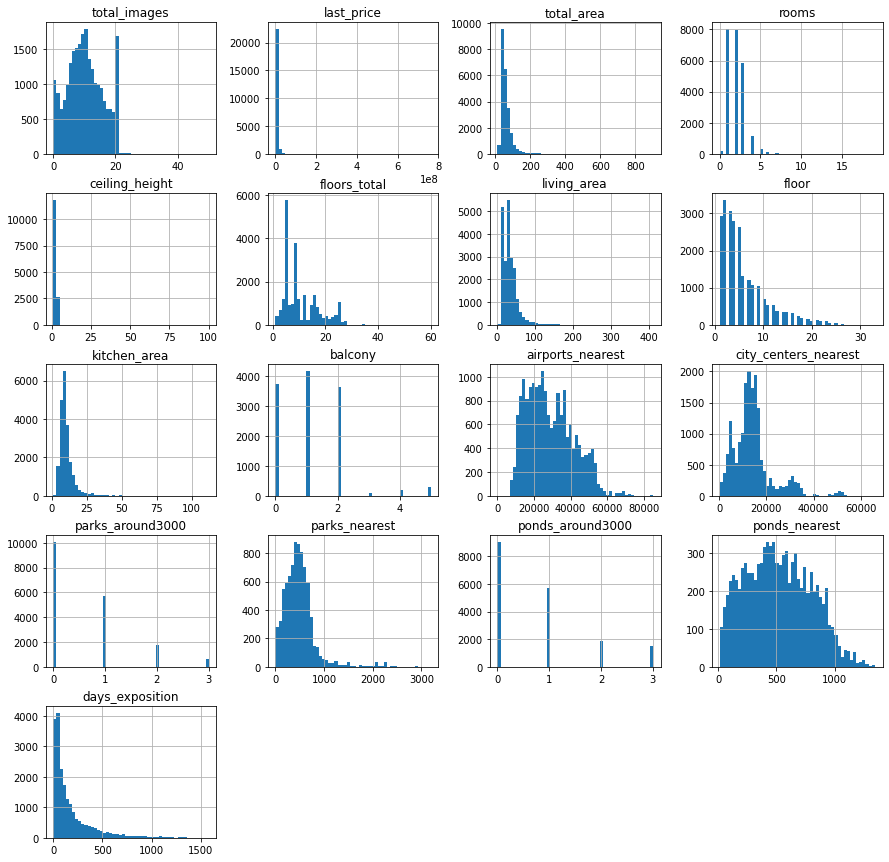

In [ ]:
df.hist(figsize=(15, 15), bins=50);


В данных присутствует множество пропусков, неверные форматов, ошибки в именах столбцов. Графики имеют длинные хвосты и возможно выбросы,
будет ясно при детальном рассмотрении.

## Предобработка данных

### Обработка явных дубликатов

In [ ]:
df.duplicated().sum()

0


Проверка на явные дубликаты показала их отсутствие

### Обработка пропусков и выбросов

#### Высота потолков

In [ ]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      


Значения подобные 25, определенно являются ошибкой ввода и должны быть 2.5.  
А вот значения 1 м или 8 м выглядят неправдоподобными и могут негативно сказаться на дальнейших расчетах, их следует удалить,
к тому же их количество невелико. 

In [ ]:
len(df[df['ceiling_height'] > 40])

1

In [ ]:
df = df.drop(labels=df[df['ceiling_height'] > 40].index, axis=0).reset_index(drop=True)

In [ ]:
len(df['ceiling_height'].unique())

183

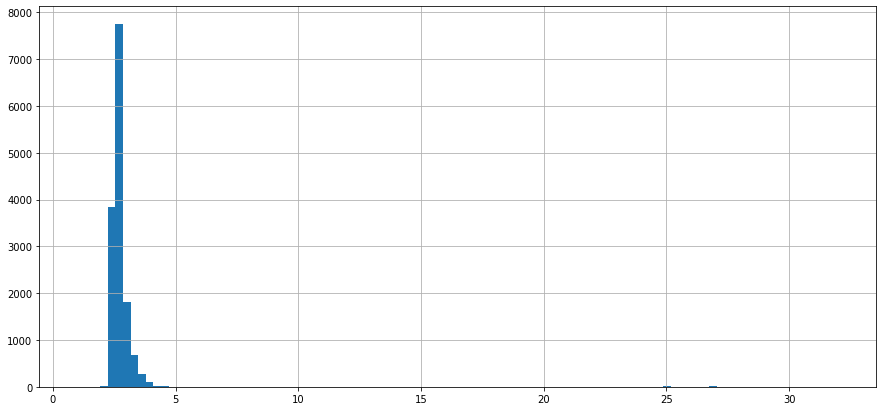

In [ ]:
df['ceiling_height'].hist(bins=100,figsize=(15, 7));

In [ ]:
def division_by_ten(x):
    if x < 10:
        return x
    return x/10
df['ceiling_height'] = df['ceiling_height'].apply(division_by_ten)

In [ ]:
df['ceiling_height'].sort_values().unique()

array([1.  , 1.03, 1.2 , 1.4 , 1.75, 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34,
       2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.

In [ ]:
print(len(df[df['ceiling_height'] < 2]))
len(df[df['ceiling_height'] > 5])

5


11

In [ ]:
df = df.drop(labels=df[df['ceiling_height'] < 2].index, axis=0).reset_index(drop=True)
df = df.drop(labels=df[df['ceiling_height'] > 5].index, axis=0).reset_index(drop=True)

In [ ]:
df['ceiling_height'].nunique()

162

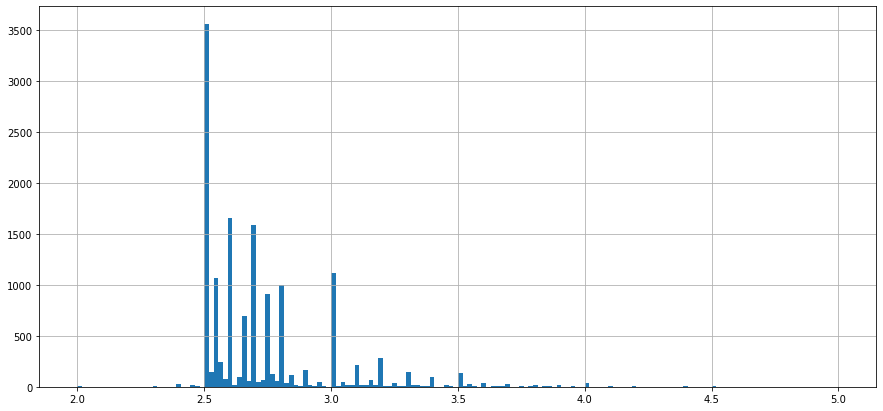

In [ ]:
df['ceiling_height'].hist(bins=162, figsize= (15, 7));

In [ ]:
df['ceiling_height'].isna().sum()

9195

In [ ]:
df['ceiling_height'].describe()

count    14487.000000
mean         2.725270
std          0.271811
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64


Медиана соответствует наиболее распространенной стандартной высоте потолков, поэтому пропуски можно заполнить медианным значением

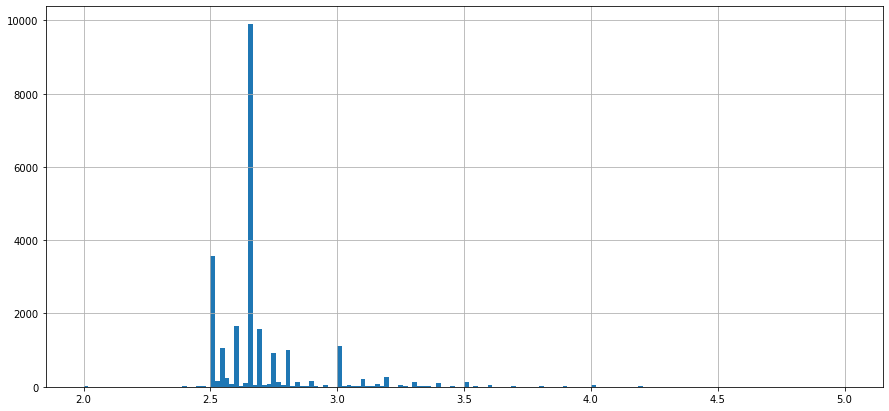

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].hist(bins=162, figsize= (15, 7));


В результате были удалены выделяющиеся неправдоподобные значения, ошибочно записанные приведены в надлежащий вид, пропуски заполнены медианным значением.

#### Всего этажей

In [ ]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

In [ ]:
df['floors_total'].nunique()

35

In [ ]:
df['floors_total'].isna().sum()

86

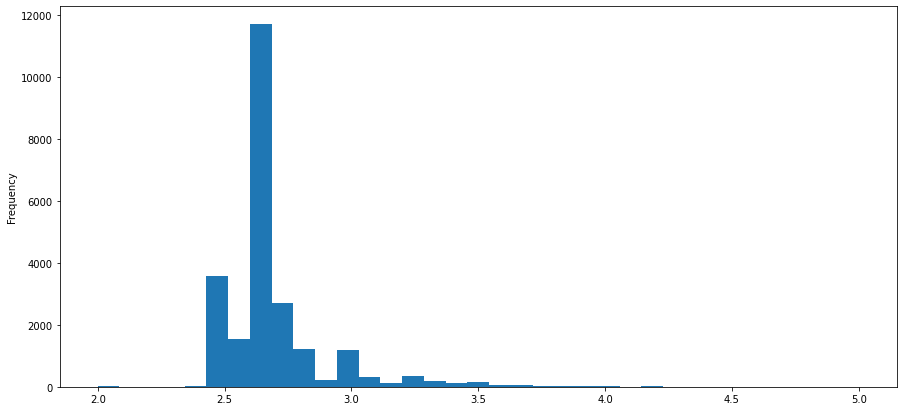

In [ ]:
df['ceiling_height'].plot(kind='hist', bins=35,figsize=(15, 7), y = df['floors_total']);


В результате осмотра не было выявлено отклонений, большинство значений распространенные, выбросов нет, количество пропусков невелико

#### Жилая площадь

In [ ]:
df['living_area'].nunique()

1782

In [ ]:
df['living_area'].isna().sum()

1901

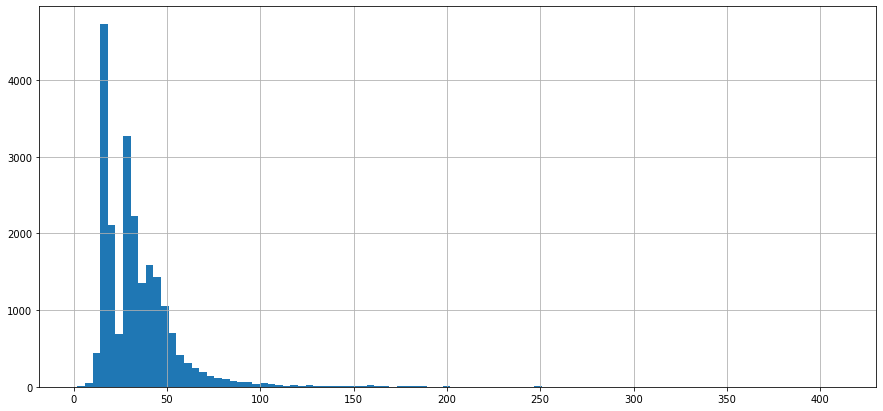

In [ ]:
df['living_area'].hist(bins=100, figsize= (15, 7));

In [ ]:
df.groupby('living_area')['living_area'].count()

living_area
2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64


1901 пропуск не стоит заполнять, чтобы не оказать влияния на результаты исследования.  
Большие размеры жилья удивительными не кажутся, маленькие размеры могли бы показаться странными, но вероятно это появившиеся в последнее время квартиры для получения прописки. Думаю их стоит оставить, ведь у них присутствует важная функция. Таким образом мы не допустим искажения данных.

#### Аппартаменты

In [ ]:
df['is_apartment'].isna().sum()

20909

In [ ]:
df.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2724
True       49
Name: is_apartment, dtype: int64

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna('False')


Апартаменты еще не очень распространенны в нашей стране и многие даже не знают что это такое (если б мы знали что это такое...),
отсюда и множество пропусков. Очевидно, что человек владеющий апартаментами, знает о том, что владеет апартаментами
и укажет этот немаловажный пункт. В результате мы приходим к выводу что все пропуски это False.

#### Площадь кухни

In [ ]:
df['kitchen_area'].isna().sum()

2273

In [ ]:
df['kitchen_area'].nunique()

970

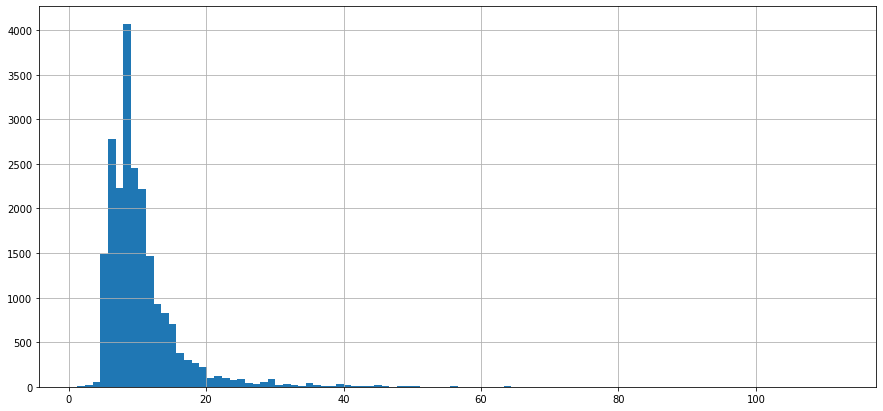

In [ ]:
df['kitchen_area'].hist(bins=100, figsize= (15, 7));

In [ ]:
df[df['kitchen_area'] > 40].groupby('kitchen_area')['kitchen_area'].count().sum()

130

In [ ]:
df[df['kitchen_area'] < 4.5].groupby('kitchen_area')['kitchen_area'].count().sum()

63

In [ ]:
df = df.drop(labels=df[df['kitchen_area'] > 40].index, axis=0).reset_index(drop=True)
df = df.drop(labels=df[df['kitchen_area'] < 4.5].index, axis=0).reset_index(drop=True)

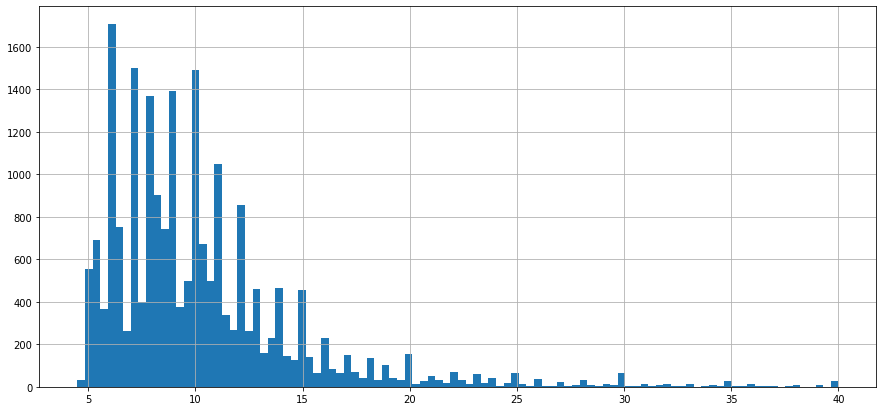

In [ ]:
df['kitchen_area'].hist(bins=100, figsize= (15, 7));


Ситуация с пропусками как и у жилых площадей: не стоит их трогать, чтобы не допустить искажения данных. Нереалистично большие и маленькие кухни удалены.

#### Балконы

In [ ]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [ ]:
df['balcony'].isna().sum()

11404

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

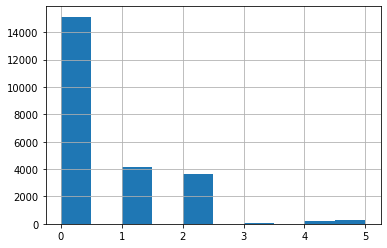

In [ ]:
df['balcony'].hist();


Пропуски очевидно означают отсутствие балкона, поэтому все были заменены на 0.

#### Ближайший аэропорт

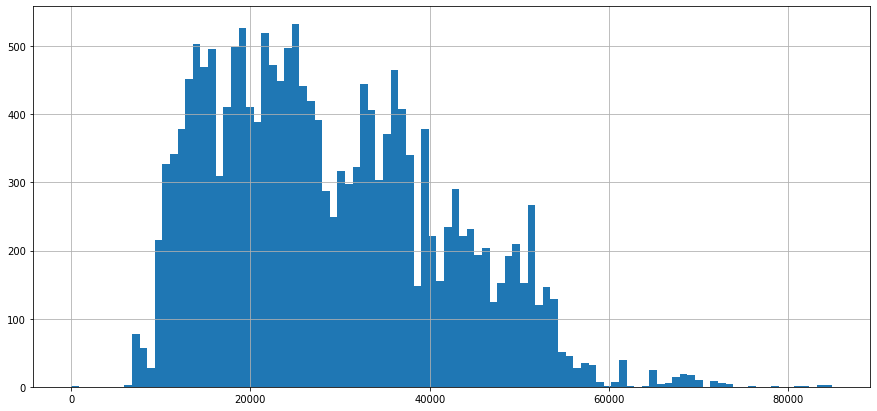

In [ ]:
df['airports_nearest'].hist(bins=100, figsize=(15, 7));

In [ ]:
df['airports_nearest'].min()

0.0

In [ ]:
df = df.drop(labels=df[df['airports_nearest'] < 100].index, axis=0).reset_index(drop=True)

In [ ]:
df['airports_nearest'].max()

84869.0

In [ ]:
df['airports_nearest'].isna().sum()

5520


Не думаю что заполнять пропуски является правильным решением, они вероятно возникли из-за отсутствия аэропортов поблизости.

#### Расстояние до центра города

In [ ]:
df['city_centers_nearest'].isna().sum()

5498

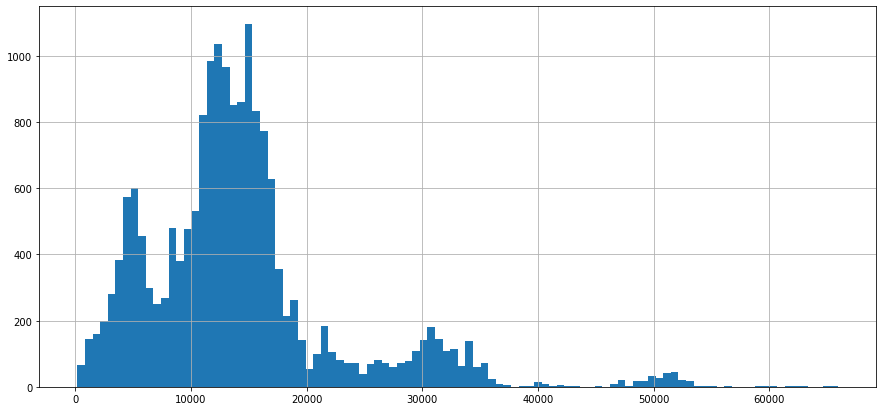

In [ ]:
df['city_centers_nearest'].hist(bins=100, figsize=(15, 7));


Так же как и с аэропортами, пропущенные значения могут говорить о том что объявление из какой-нибудь деревни.

####  количество парков в радиусе 3000 м

In [ ]:
df['parks_around3000'].isna().sum()

5497

In [ ]:
df.groupby('parks_around3000')['parks_around3000'].count()

parks_around3000
0.0    10012
1.0     5633
2.0     1713
3.0      633
Name: parks_around3000, dtype: int64

In [ ]:

df.query('parks_nearest <= 3000').groupby('parks_around3000')['parks_around3000'].count()

parks_around3000
1.0    5633
2.0    1713
3.0     633
Name: parks_around3000, dtype: int64


Поскольку значения получены автоматически, присутствует категория 0, в которой нет парков, но пропуски все же возникли, 
нельзя предпологать что пропуски означают отсутствие парков и должны попасть в категорию 0. Соответственно это ошибки или 
потери в данных. Тогда их лучше не заполнять. Можно поискать связь со столбцом "parks_nearest"

#### ближайший парк

In [ ]:
df['parks_nearest'].isna().sum()

15505

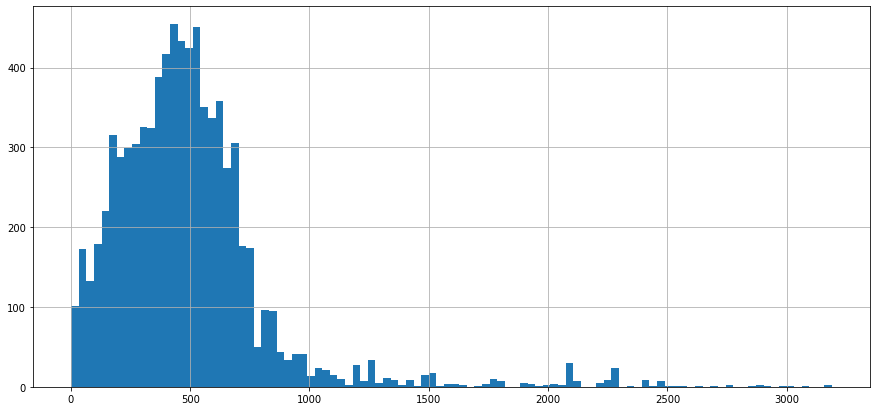

In [ ]:
df['parks_nearest'].hist(bins=100, figsize=(15, 7));

In [ ]:
df['parks_nearest'].sort_values()

14497    1.0
11842    3.0
22735    4.0
9256     7.0
2505     9.0
        ... 
23480    NaN
23481    NaN
23484    NaN
23485    NaN
23487    NaN
Name: parks_nearest, Length: 23488, dtype: float64

In [ ]:
df['parks_nearest'].sort_values(ascending=False)

10861    3190.0
19261    3190.0
1577     3064.0
19041    3013.0
22873    2984.0
          ...  
23480       NaN
23481       NaN
23484       NaN
23485       NaN
23487       NaN
Name: parks_nearest, Length: 23488, dtype: float64

In [ ]:
df.query('parks_nearest.isna()').groupby('parks_around3000')['parks_around3000'].count()

parks_around3000
0.0    10008
Name: parks_around3000, dtype: int64

In [ ]:
df.query('parks_around3000.isna()').groupby('parks_nearest')['parks_nearest'].count()

Series([], Name: parks_nearest, dtype: int64)


10008 пропусков попали в категорию 0 столбца "parks_around3000". Значит они > 3000. Но точнее не сказать.  
А вот 5497 пропусков в "parks_around3000" совпали с пропусками в "parks_nearest", значит данные отсутствуют и мы их заполнять не будем, дабы не вносить искажения.  
Итак было обнаруженно все распределение пропусков в столбцах "parks_around3000" и "parks_nearest"


Стоит заметить что только 4 парка без пропусков попали в категорию 0 "parks_around3000".  
С остальными данными все в порядке.

#### количество прудов в радиусе 3000 м

In [ ]:
df['ponds_around3000'].isna().sum()

5497

In [ ]:
df.groupby('ponds_around3000')['ponds_around3000'].count()

ponds_around3000
0.0    8996
1.0    5661
2.0    1868
3.0    1466
Name: ponds_around3000, dtype: int64

In [ ]:
df.query('ponds_nearest <= 3000').groupby('ponds_around3000')['ponds_around3000'].count()

ponds_around3000
1.0    5661
2.0    1868
3.0    1466
Name: ponds_around3000, dtype: int64


Поскольку значения получены автоматически, присутствует категория 0, в которой нет прудов, но пропуски все же возникли, нельзя предпологать что пропуски означают отсутствие прудов и должны попасть в категорию 0. Соответственно это ошибки или потери в данных. Тогда их лучше не заполнять. Можно поискать связь со столбцом "ponds_nearest"

#### ближайший пруд

In [ ]:
df['ponds_nearest'].isna().sum()

14493

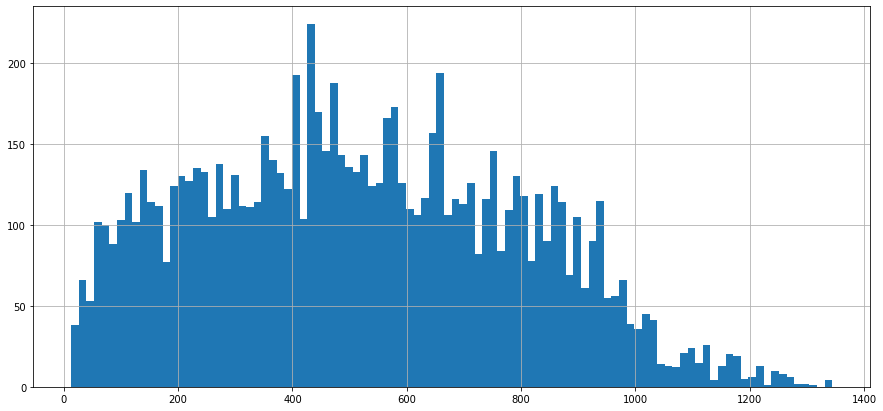

In [ ]:
df['ponds_nearest'].hist(bins=100, figsize=(15, 7));

In [ ]:
df['ponds_nearest'].sort_values()

1535     13.0
17429    13.0
10265    16.0
23134    16.0
18679    16.0
         ... 
23479     NaN
23481     NaN
23484     NaN
23485     NaN
23487     NaN
Name: ponds_nearest, Length: 23488, dtype: float64

In [ ]:
df['ponds_nearest'].sort_values(ascending=False)

20540    1344.0
18971    1341.0
19750    1341.0
1463     1337.0
11947    1313.0
          ...  
23479       NaN
23481       NaN
23484       NaN
23485       NaN
23487       NaN
Name: ponds_nearest, Length: 23488, dtype: float64

In [ ]:
df.query('ponds_nearest.isna()').groupby('ponds_around3000')['ponds_around3000'].count()

ponds_around3000
0.0    8996
Name: ponds_around3000, dtype: int64

In [ ]:
df.query('ponds_around3000.isna()').groupby('ponds_nearest')['ponds_nearest'].count()

Series([], Name: ponds_nearest, dtype: int64)


8996 пропусков попали в категорию 0 столбца "ponds_around3000". Значит они > 3000. Но точнее не сказать.  
А вот 5497 пропусков в "ponds_around3000" совпали с пропусками в "ponds_nearest", значит данные отсутствуют и мы их заполнять не будем, дабы не вносить искажения.  
Итак было обнаруженно все распределение пропусков в столбцах "ponds_around3000" и "ponds_nearest".
Интересным оказалось совпадение в числе 5497 пропусков в "ponds_around3000" и "parks_around3000", наверно потому что пруды обычно находятся в парках.

#### дней с размещения объявления

In [ ]:
df['days_exposition'].isna().sum()

3139

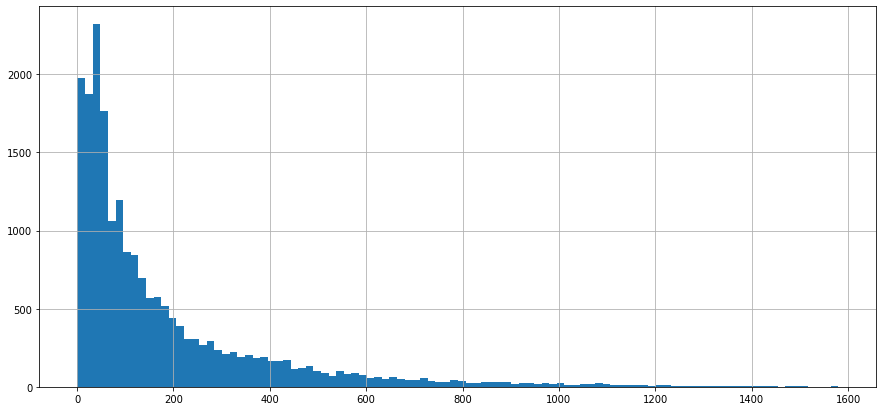

In [ ]:
df['days_exposition'].hist(bins=100, figsize=(15, 7));

In [ ]:
df['days_exposition'].max()

1580.0


С данными все нормально, пропуски появились в процессе выгрузки, ничего с ними делать не нужно(попытки угадать приведут к искажению данных).

### Изменение типов данных

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df[df['days_exposition'] == 1580]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18677,11,3500000.0,48.2,2014-12-15,2,2.5,5.0,27.4,2,False,False,False,7.7,3.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0



first_day_exposition это дата, а значит должно быть формата Datetime, в данном случае нам так нужно для продолжения работы.

In [ ]:
df['balcony'] = df['balcony'].astype('int')


С балконами приятнее работать когда они не дробные, да и не бывает такого, так что изменение типа не нанесет вреда

In [ ]:
df['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])


В столбце оказались экспоненциальные числа. Перевести их в удобочитаемый вид у меня не вышло, но на исследовании они все равно не скажутся.

In [ ]:
df['is_apartment'] = df['is_apartment'].astype('bool')


В этом столбце стоят булевые значения, а значит и тип данных должен быть bool.

###  Обработка неявных дубликатов

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
def replace_locality_1(x):
    try:               
        return x.replace('поселок', 'посёлок')
    except:
        return x
def replace_locality_2(x):
    try:             
        return x.replace('посёлок при железнодорожной станции', 'посёлок')
    except:
        return x
def replace_locality_3(x):
    try:               
        return x.replace('посёлок городского типа', 'посёлок')
    except:
        return x
def replace_locality_4(x):
    try:               
        return x.replace('посёлок станции', 'посёлок')
    except:
        return x
def replace_locality_5(x):
    try:               
        return x.replace('посёлок имени', 'посёлок')
    except:
        return x
def replace_locality_6(x):
    try:               
        return x.replace('городской посёлок', 'посёлок')
    except:
        return x
def replace_locality_7(x):
    try:               
        return x.replace('коттеджный посёлок', 'посёлок')
    except:
        return x
df['locality_name'] = df['locality_name'].apply(replace_locality_1)
df['locality_name'] = df['locality_name'].apply(replace_locality_2)
df['locality_name'] = df['locality_name'].apply(replace_locality_3)
df['locality_name'] = df['locality_name'].apply(replace_locality_4)
df['locality_name'] = df['locality_name'].apply(replace_locality_5)
df['locality_name'] = df['locality_name'].apply(replace_locality_6)
df['locality_name'] = df['locality_name'].apply(replace_locality_7)

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка


Все виды поселков приведены к одному виду "посёлок". Больше дубликатов не обнаружено.



## Добавление новых столбцов

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
def square_meters_price_func(x):
    return x['last_price']/x['total_area']
df['square_meters_price'] = df.apply(square_meters_price_func, axis=1)

In [ ]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [ ]:
def floor_type_func(x):
    if x['floor'] == x['floors_total']:
        return 'последний'
    if x['floor'] == 1:
        return 'первый'
    return 'другой'
df['floor_type'] = df.apply(floor_type_func, axis=1)

In [ ]:
df['city_centers_nearest_km'] = (df['city_centers_nearest']/1000).round()

In [ ]:
df.head(13)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,day,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
5,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
6,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
7,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
8,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
9,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,True,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14.0



В таблицу добавлены новые столбцы: "цена квадратного метра", "день недели размещения объявления", "месяц размещения объявления", "год размещения объявления", "тип этажа", "расстояние до центра города в км".

## Анализ данных

### Проведите исследовательский анализ данных

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_meters_price', 'day',
       'month', 'year', 'floor_type', 'city_centers_nearest_km'],
      dtype='object')

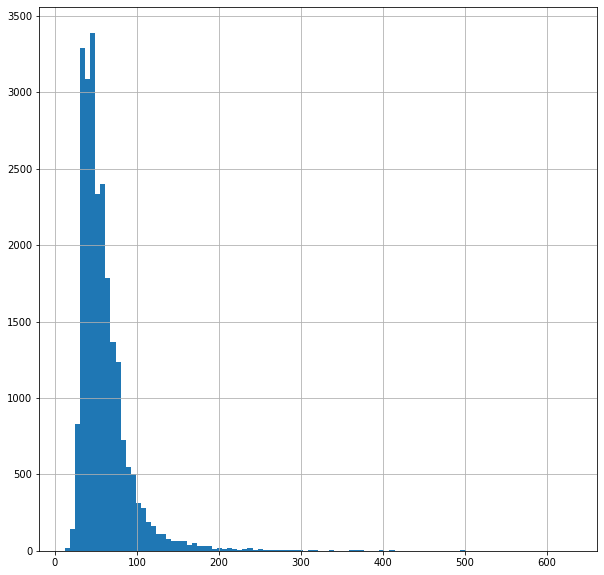

In [ ]:
df['total_area'].hist(bins=100, figsize=(10,10));

In [ ]:
df['total_area'].describe()

count    23488.000000
mean        59.660009
std         32.896043
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        631.200000
Name: total_area, dtype: float64

In [ ]:
df['total_area'].mode()

0    45.0
dtype: float64

In [ ]:
df['total_area'].corr(df['last_price'])

0.6170950742096647


По графику видно что большинство значений скапливаются в нешироком диапазоне. Описание показывает что большинство наиболее распространенных значений находятся в диапазоне 45-60, но самым часто встречающимся значением является 45 Корреляция с ценой положительная выше среднего.

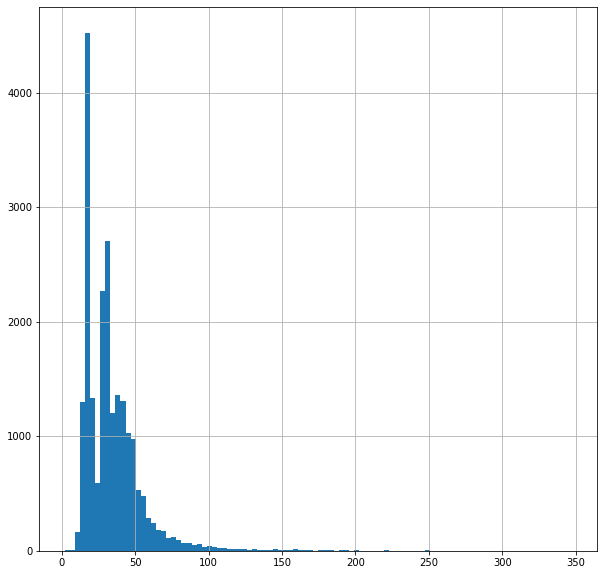

In [ ]:
df['living_area'].hist(bins=100, figsize=(10,10));

In [ ]:
df['living_area'].describe()

count    21600.000000
mean        34.158584
std         20.804763
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

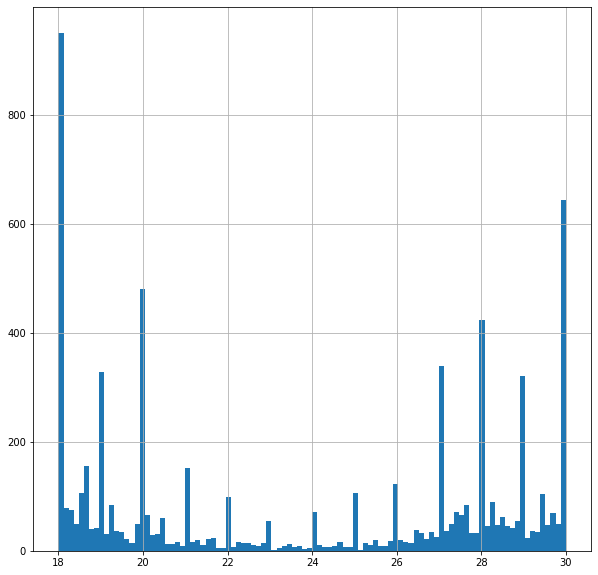

In [ ]:
df['living_area'].hist(bins=100, figsize=(10,10), range=(18, 30));

In [ ]:
df['living_area'].mode()

0    18.0
dtype: float64

In [ ]:
df['living_area'].corr(df['last_price'])

0.538541674331752


По графику видно что большинство значений скапливаются в нешироком диапазоне. Большинство наиболее распространенных значений находятся в диапазонах 18-20 и 28-34 с провалом в диапазоне 20-28, самым часто встречающимся значением является 18. Корреляция с ценой положительная средняя.

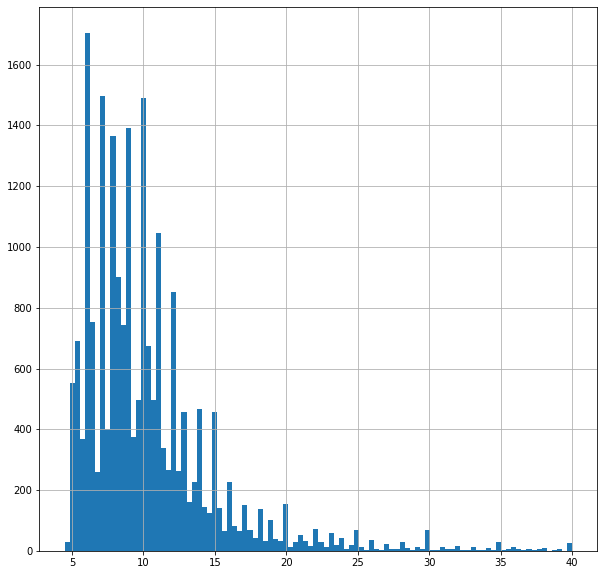

In [ ]:
df['kitchen_area'].hist(bins=100, figsize=(10,10));

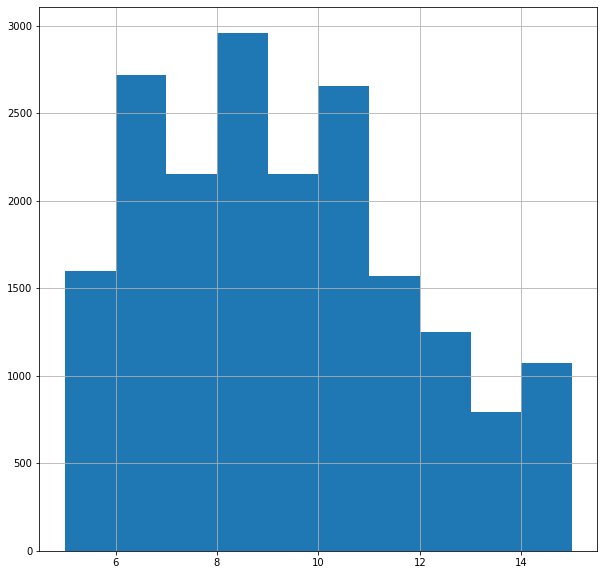

In [ ]:
df['kitchen_area'].hist(bins=10, figsize=(10,10), range=(5, 15));

In [ ]:
df['kitchen_area'].describe()

count    21215.000000
mean        10.333312
std          4.801918
min          4.500000
25%          7.000000
50%          9.100000
75%         12.000000
max         40.000000
Name: kitchen_area, dtype: float64

In [ ]:
df['kitchen_area'].corr(df['last_price'])

0.459258957137489


По графику видно что большинство значений скапливаются в диапазоне 5-15. Наиболее распространенные значения 6, 8, 10. Корреляция с ценой положительная средняя.

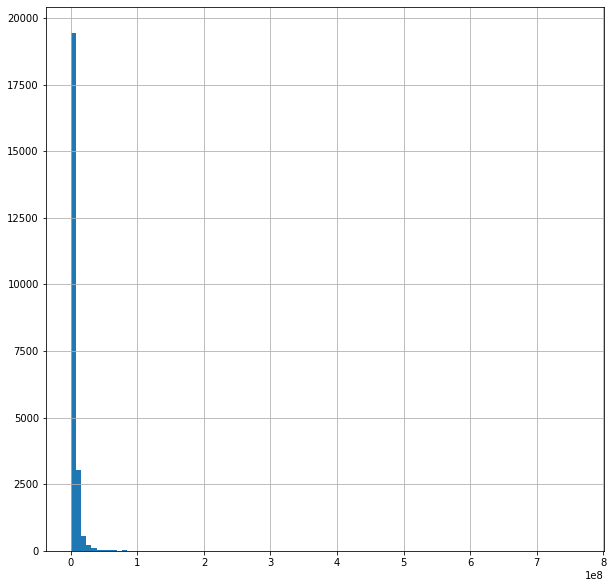

In [ ]:
df['last_price'].hist(bins=100, figsize=(10,10));

In [ ]:
df['last_price'].describe()

count    2.348800e+04
mean     6.338257e+06
std      9.803721e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

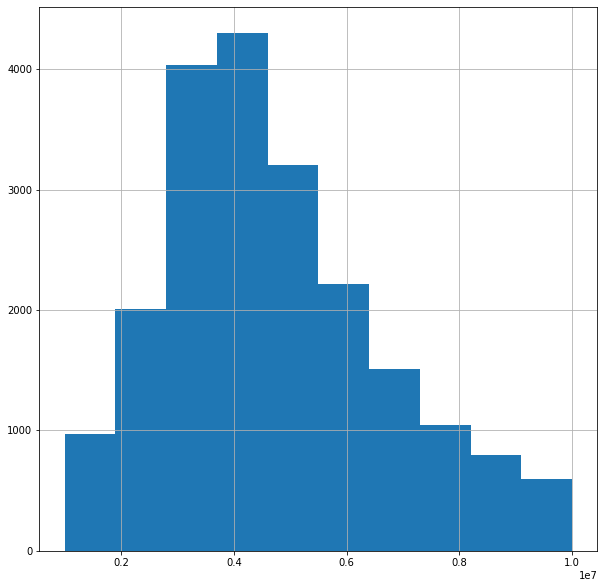

In [ ]:
df['last_price'].hist(bins=10, figsize=(10,10), range=(1000000, 10000000));

In [ ]:
df['last_price'].mode()

0    4500000.0
dtype: float64


По графику видно что большинство значений скапливаются в диапазоне от 3 млн. до 6 млн, наиболее распространенные значения по убыванию популярности 4, 3, 5, 6 млн., самым часто встречающимся значением является 4.5 млн.

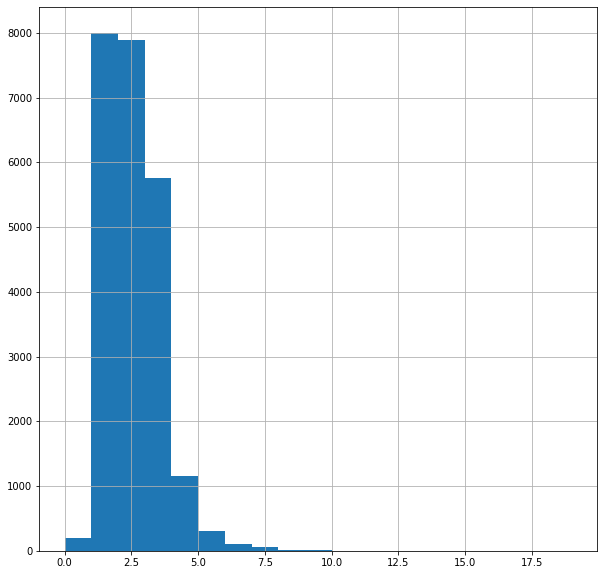

In [ ]:
df['rooms'].hist(bins=19, figsize=(10,10));

In [ ]:
df['rooms'].describe()

count    23488.000000
mean         2.063351
std          1.064764
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
df['rooms'].corr(df['last_price'])

0.34755215885691465


Наиболее распространенные значения по убыванию популярности 1, 2, 3. Корреляция с ценой ниже среднего.

In [ ]:
import numpy as np
df['ceiling_height'] = np.round(df['ceiling_height'], decimals = 1)

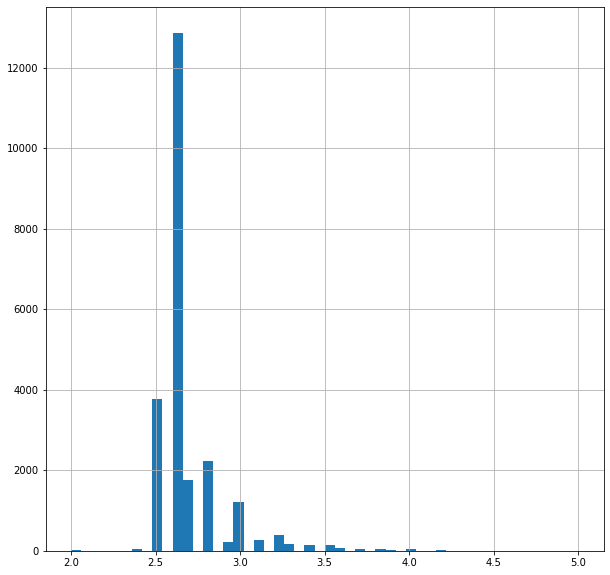

In [ ]:
df['ceiling_height'].hist(bins=50, figsize=(10,10));

In [ ]:
np.round(df['ceiling_height'].describe(), decimals = 1)

count    23488.0
mean         2.7
std          0.2
min          2.0
25%          2.6
50%          2.6
75%          2.7
max          5.0
Name: ceiling_height, dtype: float64

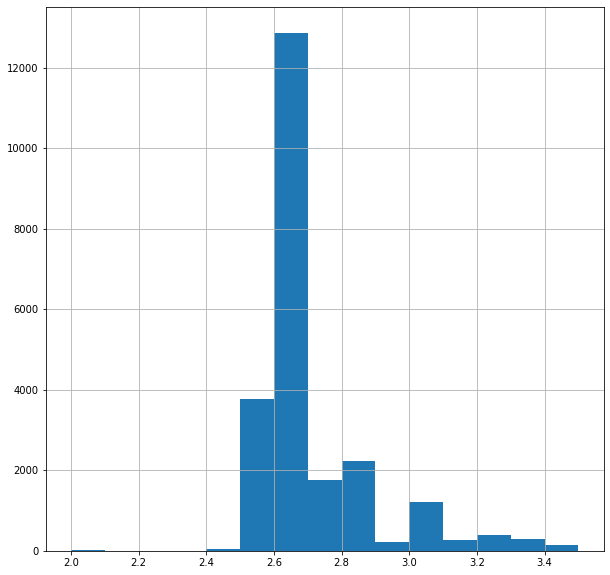

In [ ]:
df['ceiling_height'].hist(bins=15, figsize=(10,10), range=(2, 3.5));

In [ ]:
df['ceiling_height'].corr(df['last_price'])

0.2672910896182228

In [ ]:
df['ceiling_height'].mode()

0    2.6
dtype: float64


По графику видно что большинство значений скапливаются диапазоне 2.4-3. Большинство наиболее распространенных значений находятся в диапазонах 2.5-2.8, самым часто встречающимся значением является 2.6. Корреляция с ценой положительная слабая.

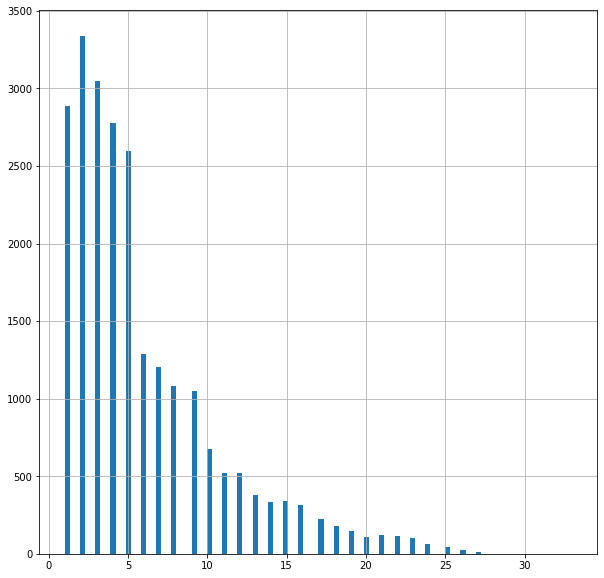

In [ ]:
df['floor'].hist(bins=100, figsize=(10,10));

In [ ]:
df['floor'].describe()

count    23488.000000
mean         5.894499
std          4.884525
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

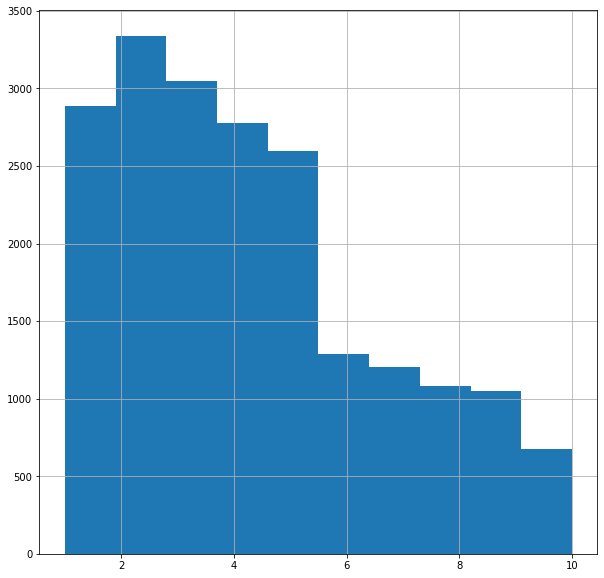

In [ ]:
df['floor'].hist(bins=10, figsize=(10,10), range=(1, 10));

In [ ]:
df['floor'].corr(df['last_price'])

0.026953679550085145


Большинство значений в диапазоне 1-10, наиболее распространенные с 1 по 5, самое часто встречающееся 2. Корреляция отсутствует (ничтожно мала).

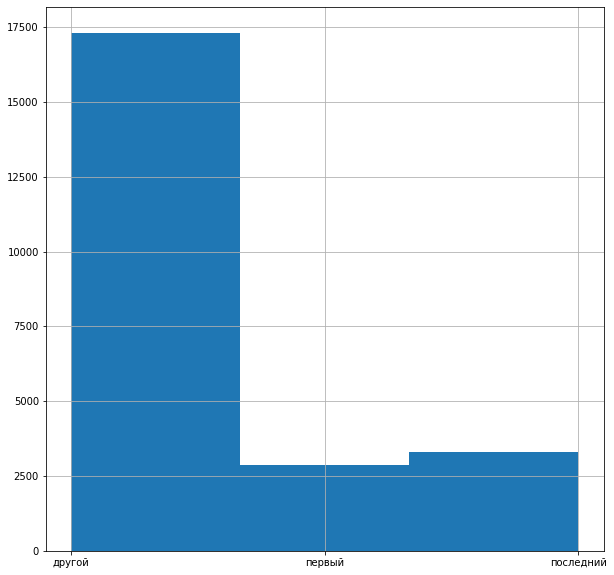

In [ ]:
df['floor_type'].hist(bins=3, figsize=(10,10));


Самые распространенные этажи - это любые кроме первого и последнего, последние этажи популярнее первых.


Можно было бы предположить что так как 1-е этажи являются 3-ми по популярности, их должно быть больше чем последних, но стоит учитывать разную этажность домов, где последним может быть 5, 10, 12, 15 и т.д. которые суммируются, а также одноэтажные дома где этаж является и первым и последним. В нашем случае он попал в категорию последних.

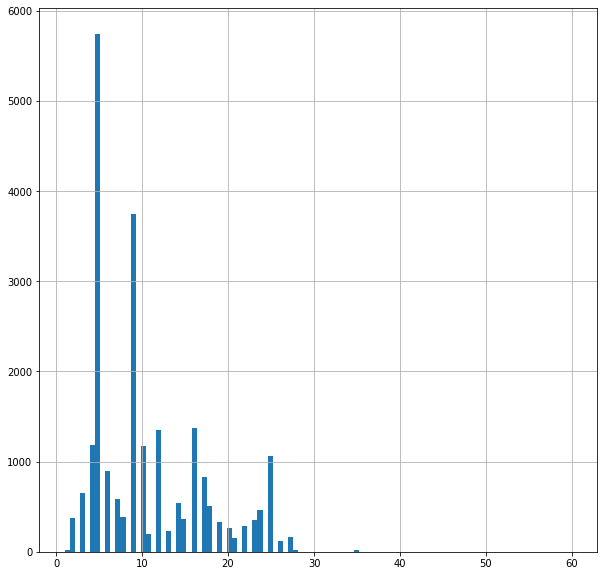

In [ ]:
df['floors_total'].hist(bins=100, figsize=(10,10));

In [ ]:
df['floors_total'].describe()

count    23403.000000
mean        10.690253
std          6.595008
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

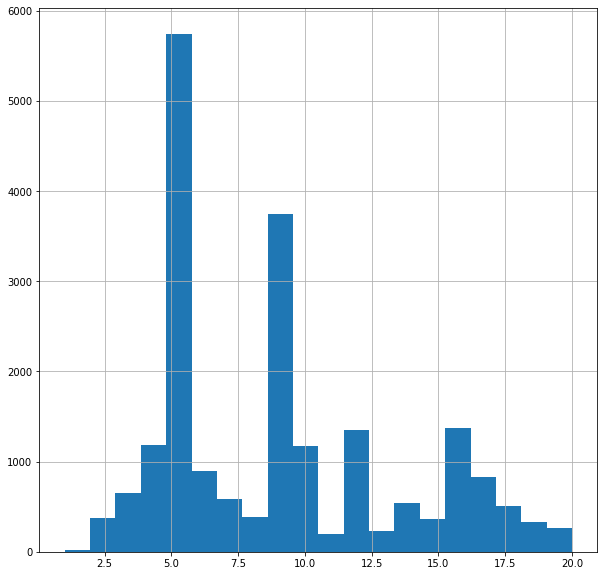

In [ ]:
df['floors_total'].hist(bins=20, figsize=(10,10), range=(1, 20));

In [ ]:
df['floors_total'].corr(df['last_price'])

-0.0010415593830175743


Больше всего 5-ти и 10-ти этажных домов. Корреляция отсутствует. 

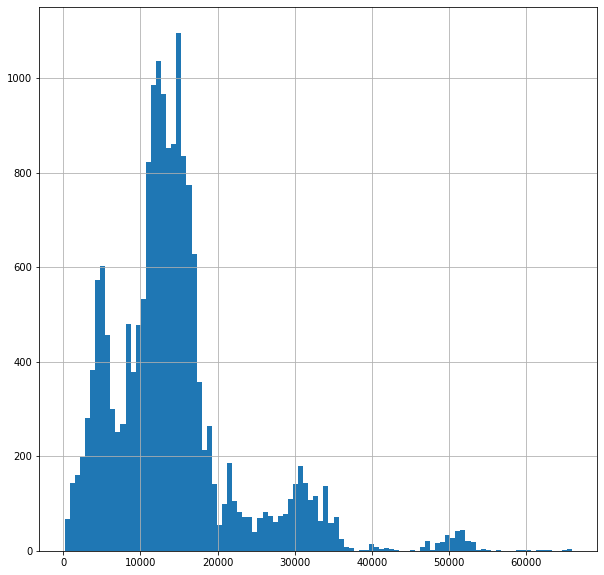

In [ ]:
df['city_centers_nearest'].hist(bins=100, figsize=(10,10));

In [ ]:
df['city_centers_nearest'].describe()

count    17990.000000
mean     14225.229739
std       8604.287267
min        181.000000
25%       9289.000000
50%      13115.000000
75%      16316.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
df['city_centers_nearest'].corr(df['last_price'])

-0.21146889497781635


Наибольшее количество значений попало в диапазон от 10 км до 17 км. Корреляция отрицательная слабая.

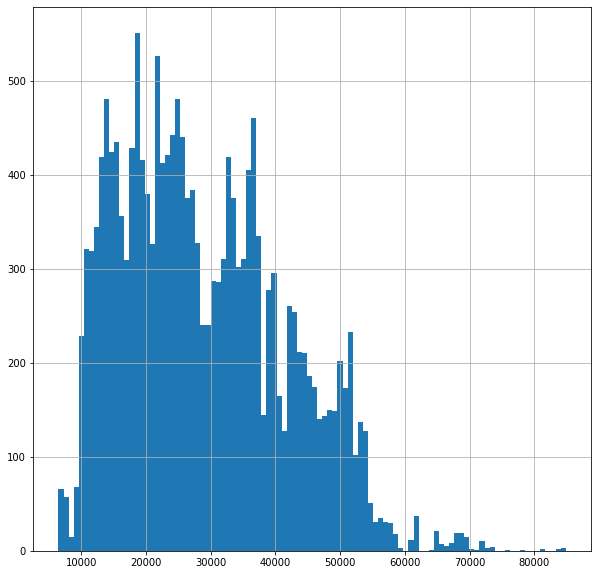

In [ ]:
df['airports_nearest'].hist(bins=100, figsize=(10,10));

In [ ]:
df['airports_nearest'].describe()

count    17968.000000
mean     28796.093667
std      12648.948186
min       6450.000000
25%      18557.000000
50%      26729.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [ ]:
df['airports_nearest'].corr(df['last_price'])

-0.029116797482684198


Наибольшее количество значений попало в диапазон от 10 км до 28 км. Корреляция отсутствует.

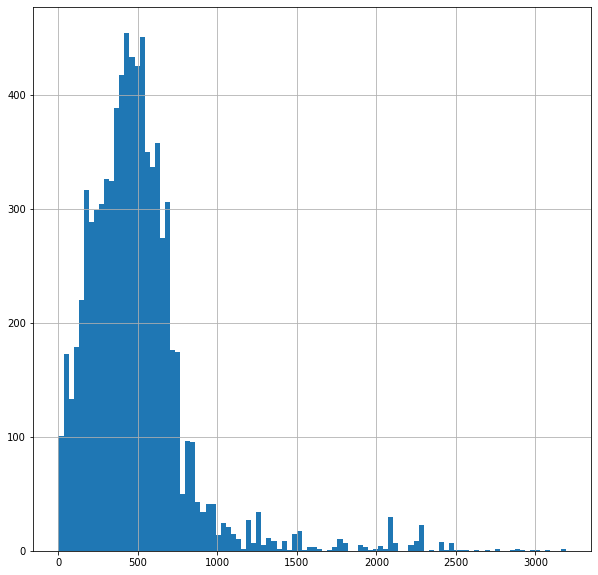

In [ ]:
df['parks_nearest'].hist(bins=100, figsize=(10,10));

In [ ]:
df['parks_nearest'].describe()

count    7983.000000
mean      491.334335
std       341.670514
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
df['parks_nearest'].corr(df['last_price'])

-0.01226173648826823


Наибольшее количество значений попало в диапазон от 300 м до 700 м. Корреляция отсутствует.

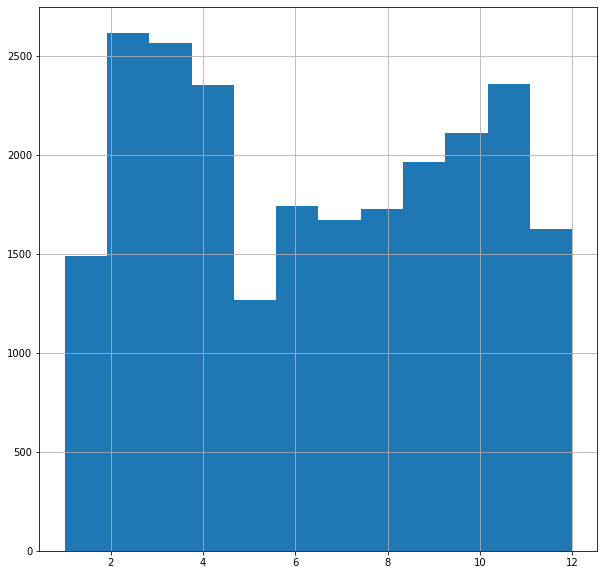

In [ ]:
df['month'].hist(bins=12, figsize=(10,10));

In [ ]:
df['month'].corr(df['last_price'])

0.0035452145830825858

In [ ]:
df.groupby('month')['month'].count().sort_values(ascending=False)

month
2     2616
3     2565
11    2357
4     2352
10    2110
9     1966
6     1744
8     1727
7     1673
12    1625
1     1488
5     1265
Name: month, dtype: int64


    
Согласно графику самым популярным месяцем для покупки квартиры является февраль, за ним, по убыванию популярности, следуют март, ноябрь, апрель. Корреляция отсутствует.

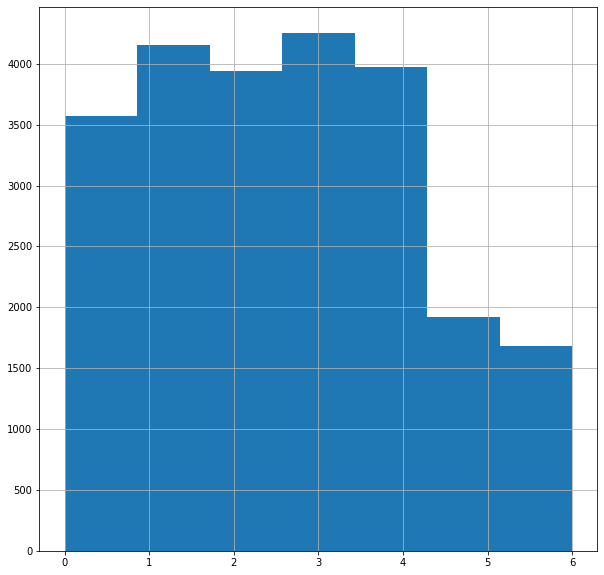

In [ ]:
df['day'].hist(bins=7, figsize=(10,10));

In [ ]:
df.groupby('day')['day'].count().sort_values(ascending=False)

day
3    4252
1    4151
4    3972
2    3938
0    3571
5    1918
6    1686
Name: day, dtype: int64

In [ ]:
df['day'].corr(df['last_price'])

0.001977008035837066


    
Согласно графику самым популярным днем для покупки квартиры является четверг, за ним, по убыванию популярности, следуют вторник, пятница, среда. Корреляция отсутствует.

<AxesSubplot:>

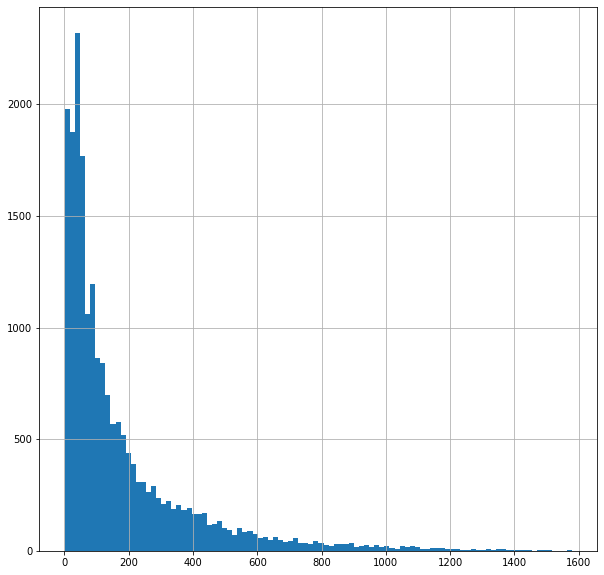

In [ ]:
df['days_exposition'].hist(bins=100, figsize=(10,10))

In [ ]:
df['days_exposition'].describe()

count    20349.000000
mean       180.484496
std        219.171805
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


В среднем квартиры продаются в течение трех месяцев, продажу быстрее 45-ти дней можно считать быстрой, продажи более 200 дней можно отнести к долгим.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

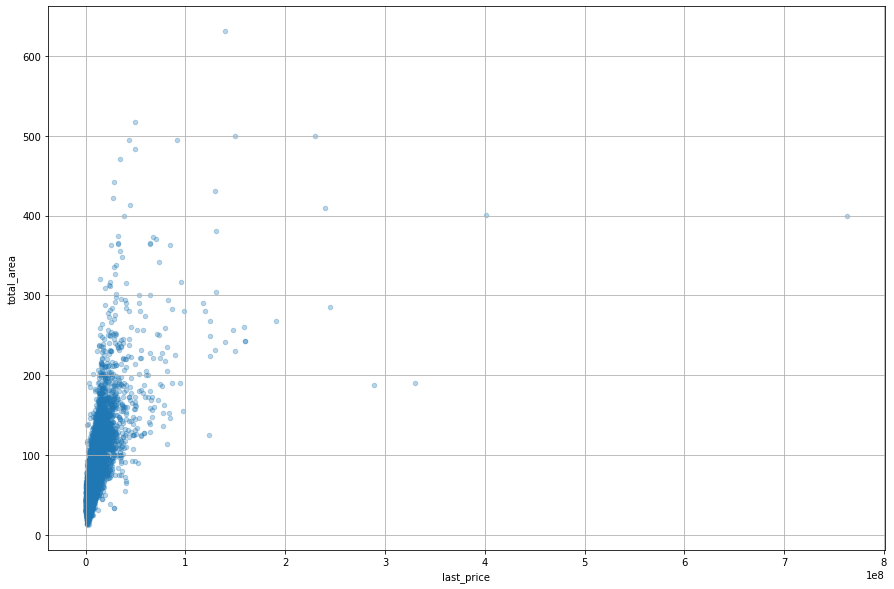

In [ ]:
df.plot(x='last_price', y='total_area', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

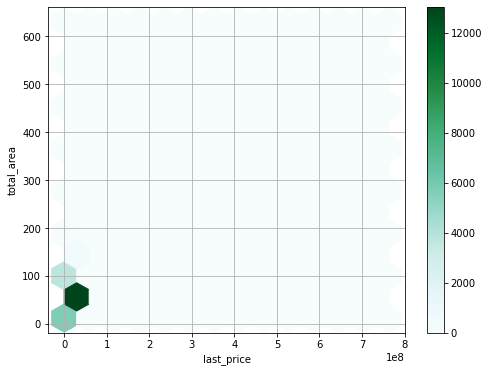

In [ ]:
df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_meters_price', 'day',
       'month', 'year', 'floor_type', 'city_centers_nearest_km'],
      dtype='object')


Наблюдается положительная умеренно сильная(выше среднего) корреляция между ценой и общей площадью.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

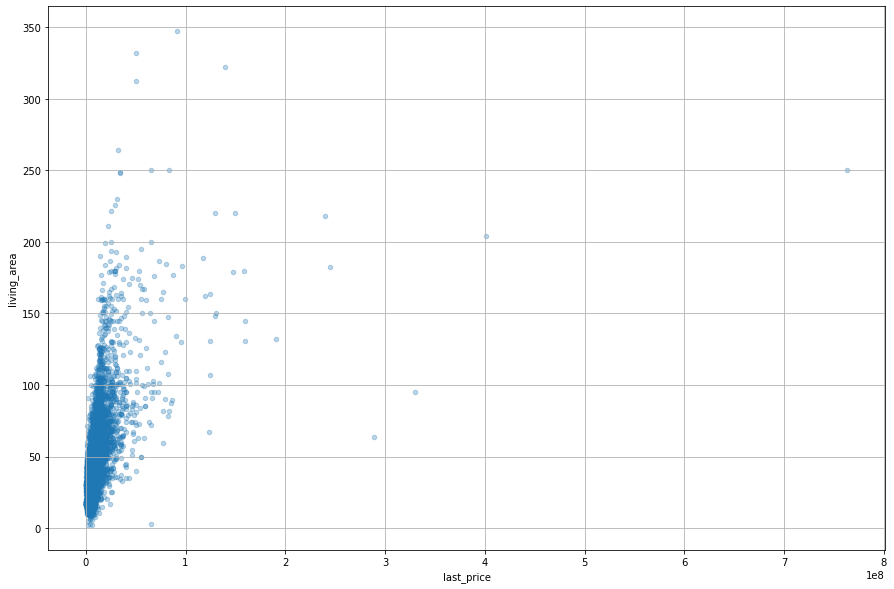

In [ ]:
df.plot(x='last_price', y='living_area', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

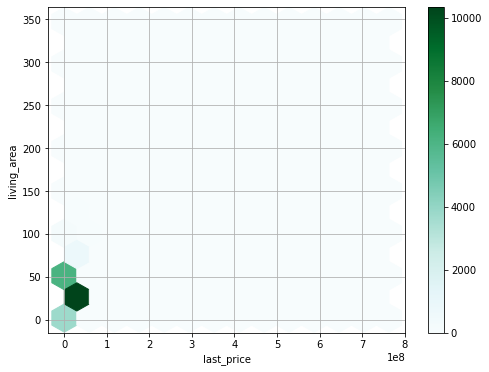

In [ ]:
df.plot(x='last_price', y='living_area', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


Наблюдается положительная средняя корреляция между ценой и жилой площадью.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

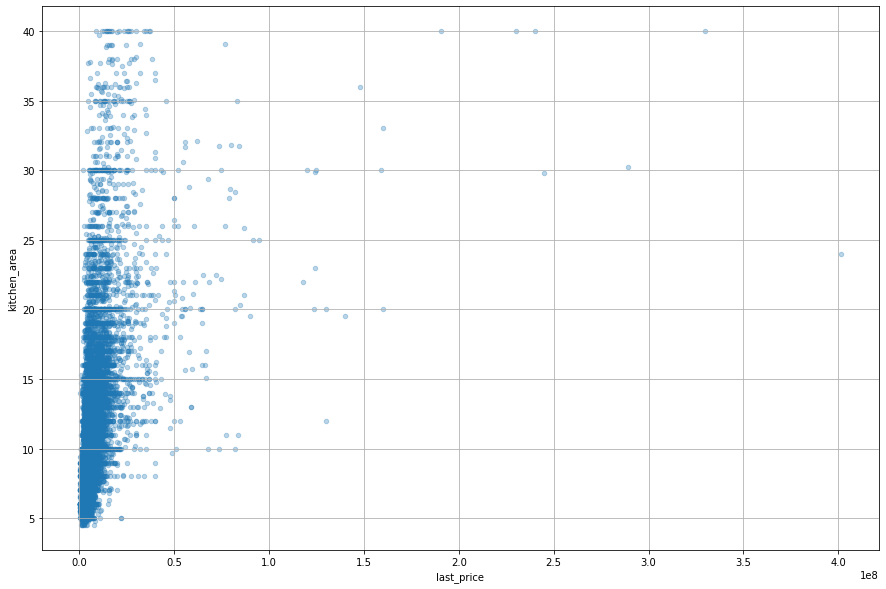

In [ ]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

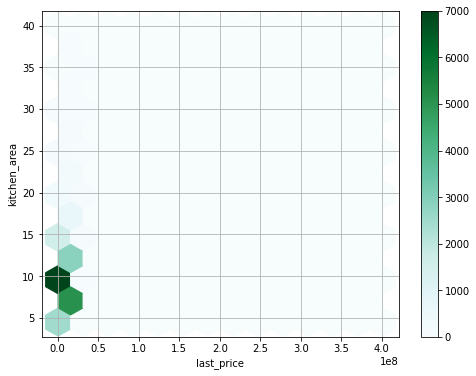

In [ ]:
df.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


Наблюдается положительная умеренно слабая(ниже среднего) корреляция между ценой и площадью кухни.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

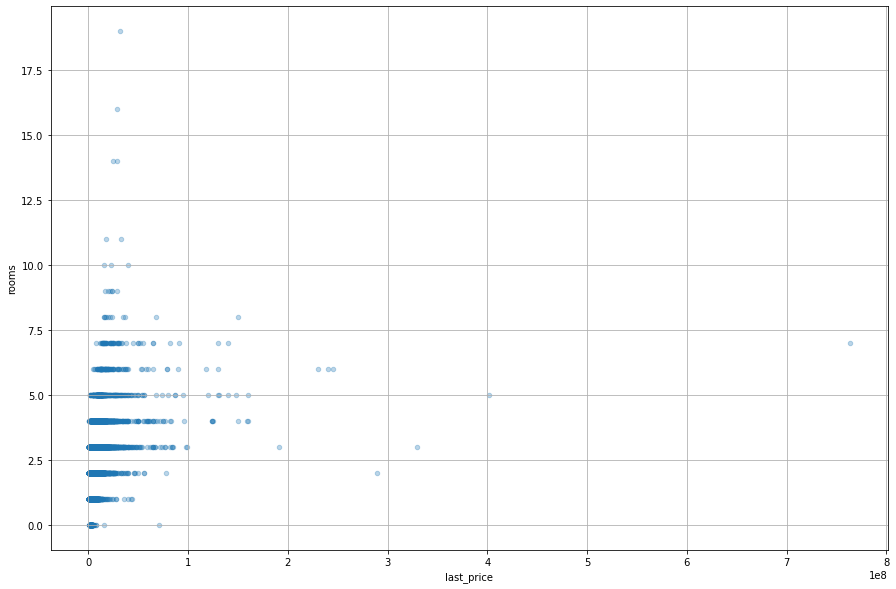

In [ ]:
df.plot(x='last_price', y='rooms', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

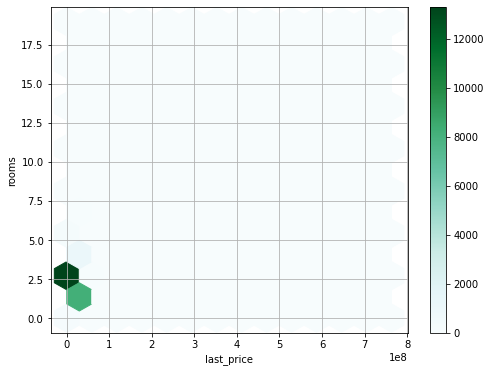

In [ ]:
df.plot(x='last_price', y='rooms', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


Наблюдается положительная умеренно слабая(ниже среднего) корреляция между ценой и количеством комнат.

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

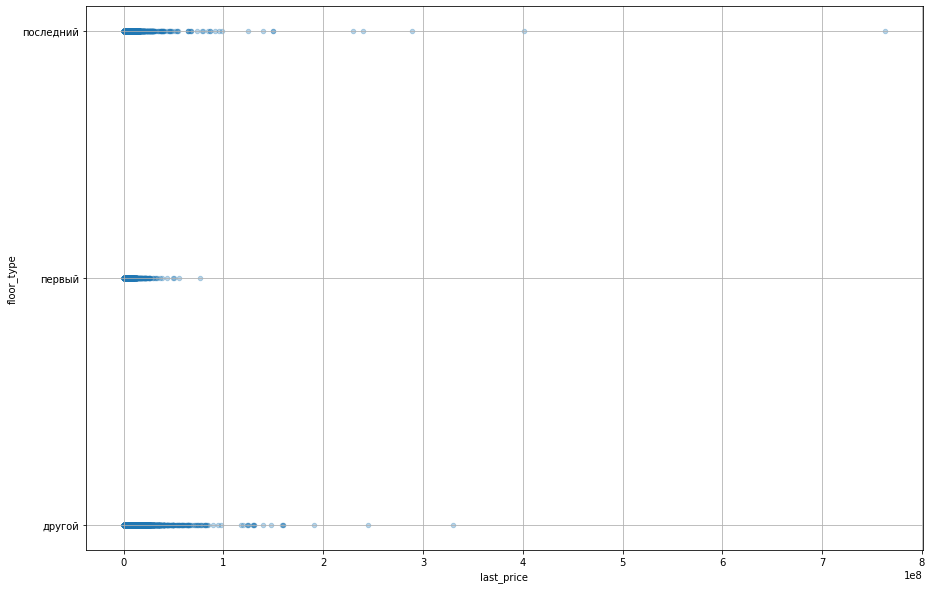

In [ ]:
df.plot(x='last_price', y='floor_type', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 


график показывает большую связь между ценой и категорией этажей "другой", меньшую между ценой и категорией этажей "последний", и самую малую между ценой и категорией этажей "первый". Но это является следствием численного преобладания каждой категории над другой соответственно.

<AxesSubplot:xlabel='last_price', ylabel='day'>

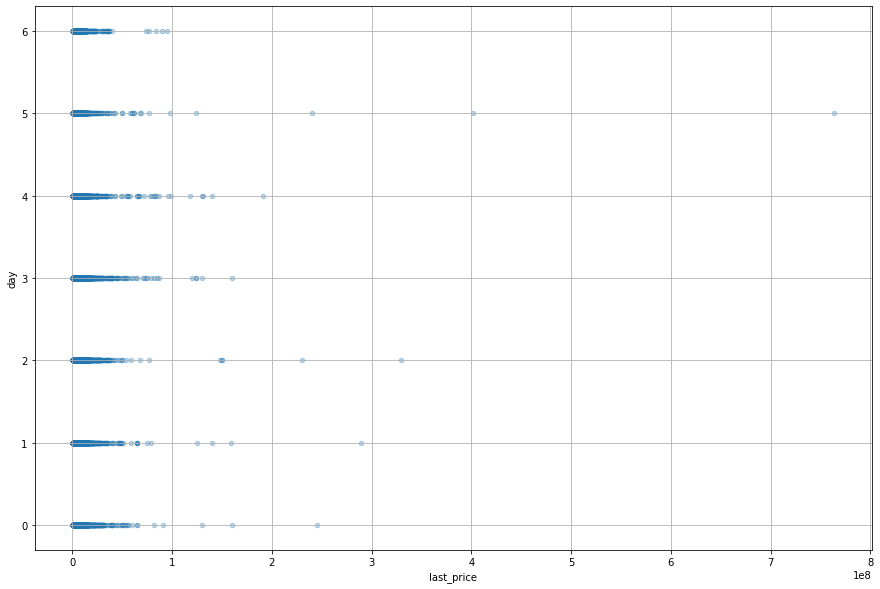

In [ ]:
df.plot(x='last_price', y='day', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='day'>

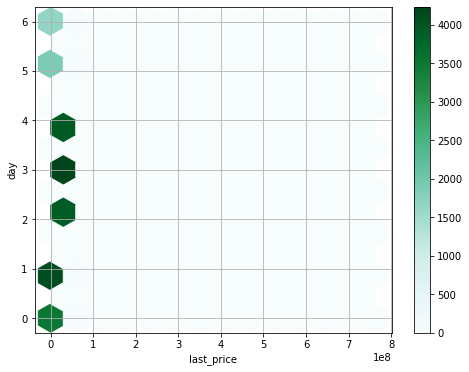

In [ ]:
df.plot(x='last_price', y='day', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


График показывает что в среду, четверг и пятницу квартиры продавались дороже, но наблюдаемые различия не существенны.

<AxesSubplot:xlabel='last_price', ylabel='month'>

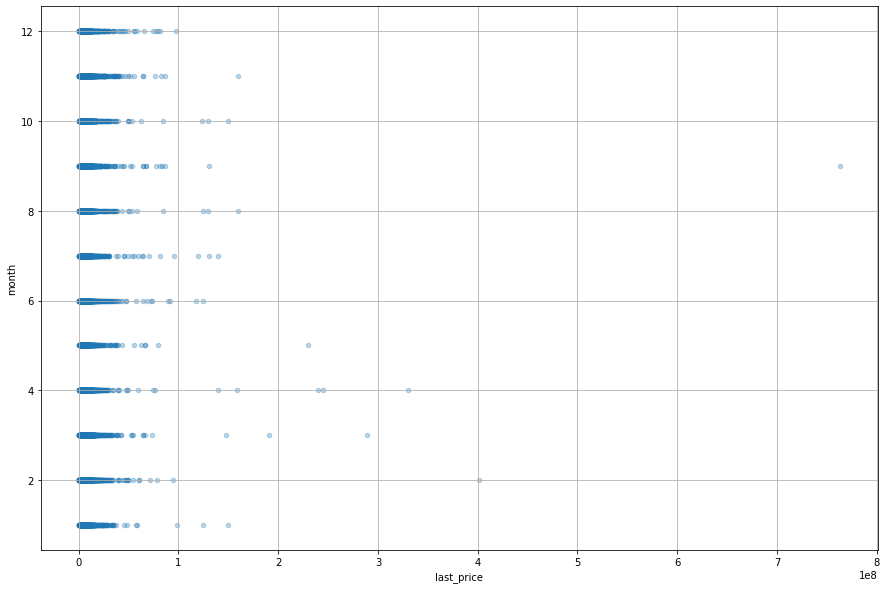

In [ ]:
df.plot(x='last_price', y='month', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='month'>

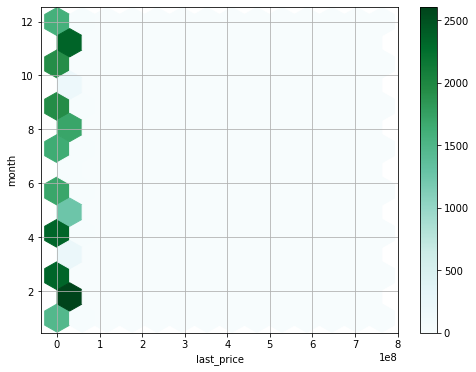

In [ ]:
df.plot(x='last_price', y='month', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


Наблюдаемые различия не существенны.

<AxesSubplot:xlabel='last_price', ylabel='year'>

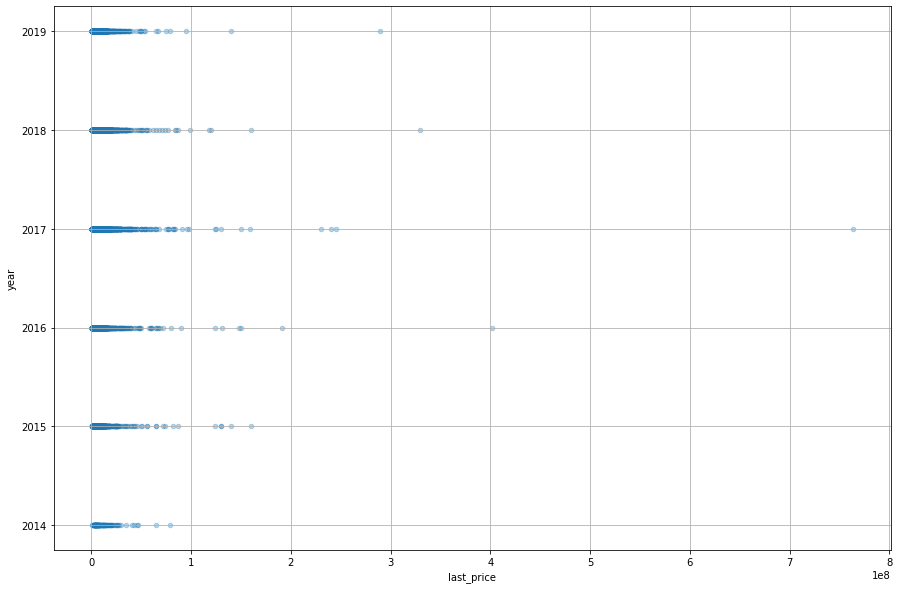

In [ ]:
df.plot(x='last_price', y='year', kind='scatter', figsize=(15, 10), grid=True, alpha=0.3) 

<AxesSubplot:xlabel='last_price', ylabel='year'>

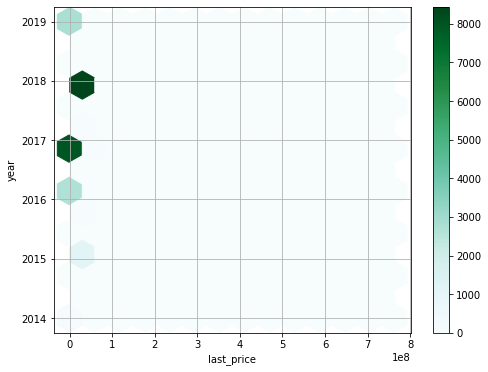

In [ ]:
df.plot(x='last_price', y='year', kind='hexbin', gridsize=13, figsize=(8, 6), sharex=False, grid=True) 


График показывает что в 2018 году цены на жилье были выше.

In [ ]:
import seaborn as sns

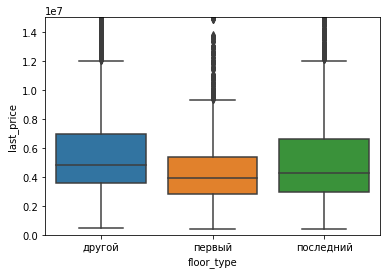

In [ ]:
sns.boxplot(x='floor_type', y='last_price', data=df)
plt.ylim(0, 15000000)
sns.set(rc = {'figure.figsize':(5, 8)})


Согласно графику, этажи кроме первого и последнего, являются более желанными для покупателя, соответственно медианная цена на них выше.

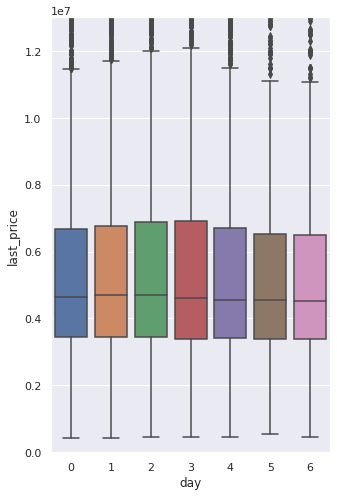

In [ ]:
sns.boxplot(x='day', y='last_price', data=df)
plt.ylim(0, 13000000)
sns.set(rc = {'figure.figsize':(8, 15)})


Наблюдается легкое повышение медианных цен с понедельника до среды, а с четверга по воскресенье их обратное снижение. То же самое и с диапазонами "нормальных" цен.

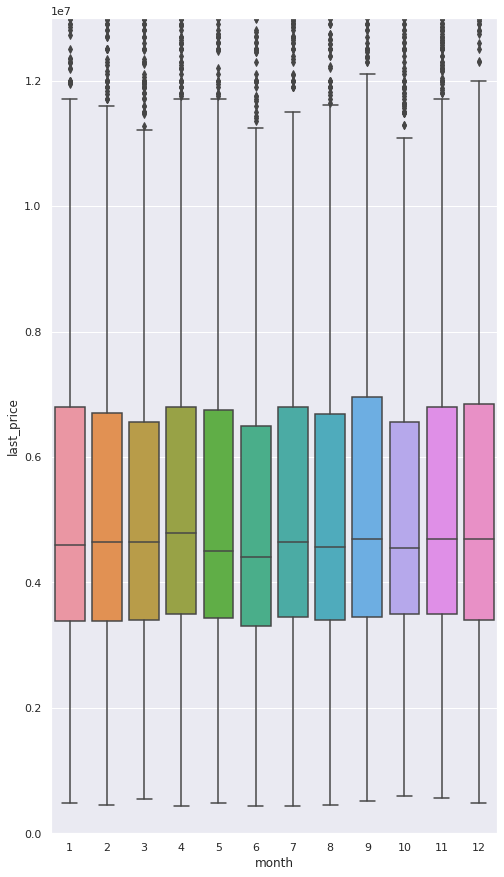

In [ ]:
sns.boxplot(x='month', y='last_price', data=df)
plt.ylim(0, 13000000)
sns.set(rc = {'figure.figsize':(15, 8)})


Присутствуют легкие колебания, но в течение года цены стараются закрепиться на одном уровне. После роста следует падение, а после снова рост.

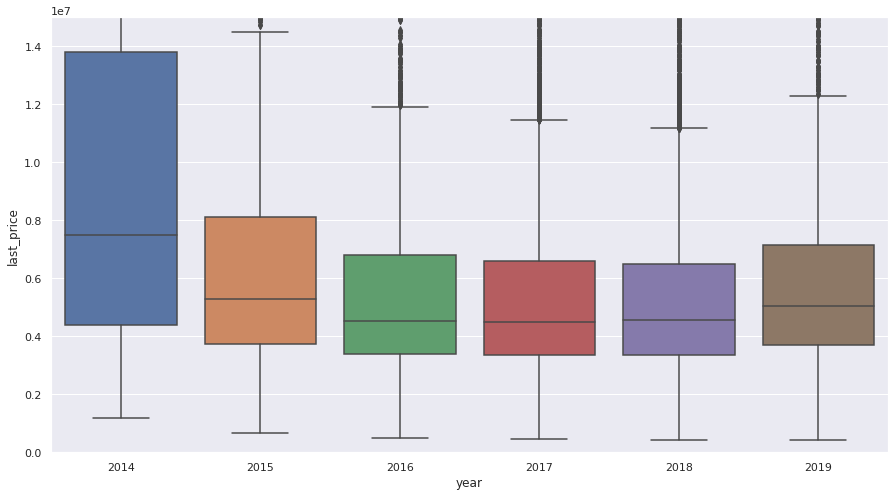

In [ ]:
sns.boxplot(x='year', y='last_price', data=df)
plt.ylim(0, 15000000)
sns.set(rc = {'figure.figsize':(5, 8)})


 В 2014 году цены были значительно выше, как медианные, так и нормальные. Далее следовало падение до 2017 года, а с 2018-2019 начался рост.

In [ ]:
df.pivot_table(
    index='locality_name', 
    values='square_meters_price', 
    aggfunc=('count', 'mean')).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15547,113969.896012
посёлок Мурино,551,85575.862203
посёлок Шушары,437,78538.976117
Всеволожск,398,68654.473986
Пушкин,361,102798.820015
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,306,68742.809198
деревня Кудрово,299,92473.547576



10 населённых пунктов с наибольшим числом объявлений

In [ ]:
df.pivot_table(
    index='locality_name', 
    values='square_meters_price', 
    aggfunc=('count', 'mean')).sort_values(by='mean').head(10)

,count,mean
locality_name,,
деревня Старополье,3,11206.221198
посёлок Свирь,2,11481.481481
деревня Вахнова Кара,1,11688.311688
деревня Выскатка,2,12335.480902
посёлок Совхозный,2,12629.129129
деревня Малая Романовка,1,12724.550898
посёлок Тёсово-4,1,12931.034483
деревня Сижно,1,13709.677419
деревня Ям-Тесово,2,13711.553373



10 населённых пунктов с самой низкой стоимостью квадратного метра. 

In [ ]:
df.pivot_table(
    index='locality_name', 
    values='square_meters_price', 
    aggfunc=('count', 'mean')).sort_values(by='mean', ascending=False).head(10)

,count,mean
locality_name,,
Зеленогорск,24,115122.799198
Санкт-Петербург,15547,113969.896012
посёлок Репино,4,104238.614786
Пушкин,361,102798.820015
Сестрорецк,183,101757.616875
посёлок Лисий Нос,3,100660.814239
Кудрово,173,100253.043304
деревня Мистолово,11,98549.976709
посёлок Левашово,1,96997.690531



10 населённых пунктов с самой высокой стоимостью квадратного метра. 

In [ ]:
km_price = df.pivot_table(index=['locality_name', 'city_centers_nearest_km'], values='square_meters_price', aggfunc='median')
km_price.query('locality_name == "Санкт-Петербург"').head()

square_meters_price
locality_name   city_centers_nearest_km                     
Санкт-Петербург 0.0                            144957.983193
                1.0                            127731.092437
                2.0                            121591.708931
                3.0                            108331.254455
                4.0                            117370.892019

In [ ]:
km_price.query('locality_name == "Санкт-Петербург"').describe()

,square_meters_price
count,30.000000
mean,105471.126293
std,17043.993417
min,76084.734212
25%,93738.533386
50%,103599.144487
75%,120536.504703
max,144957.983193



 В Санкт-Петербурге при удалении от центра города цена за квадратный метр уменьшается в среднем на 17043р.

### Общий вывод

### Общий вывод по исследованию этажей




Изначально в данных содержалось множество пропусков, в процессе изучения данных было решено вносить минимальное количество изменений, чтобы не повредить исходные данные и не повлиять на результаты исследования. В результате было удалено 211 строк из 23699. Исскаженные значения были приведены в норму. Из 101000 пропусков,  31000 были заполнены,  остальные остались нетронутыми, чтобы не исказить результаты исследования. Пропуски касающиеся прудов и парков, полученные автоматически на основе картографических данных, были признаны возникшими не из-за ошибки алгоритма, а из-за отсутствия данных. Множество дубликатов в именах населенных пунктов, возникших вследствии ручного ввода, были исправлены. Была проведена категоризация квартир по типу этажа, а также вычислены день недели когда было размещено объявление о продаже и цена за квадратный метр.  

В процессе исследования было выявлено:
 - Наиболее распространенная жилая площадь 45-60 квадратных метров, чаще всего 45. Имеет преобладающее влияние на стоимость жилья.
 - Самыми распространенными ценами на жилье являются цены в промежутке от 3 млн. до 6 млн.
 - Чаще всего квартиры имеют от 1-ой до 3-х комнат.
 - высота потолков чаще всего 2.5-2.8 метров.
 - Наиболее распространенные этажи продаваемых квартир с первого по пятый включительно.
 - Большинство продаваемых квартир находятся в 5-ти или 10-ти этажных домах.
 - Большая часть квартир находятся 10-17 км удаленности от центра города.
 - Чаще всего покупки квартир происходят в феврале, марте, ноябре, апреле.
 - Большинство сделок происходит в четверг, вторник, пятницу.
 - В среднем квартиры продаются в течение трех месяцев, продажа быстрее 45-ти дней быстрая, более 200 дней долгая.
 - этажи кроме первого и последнего, являются более желанными для покупателя, соответственно медианная цена на них выше.
 - В 2014 году цены были значительно выше. Далее следовало падение до 2017 года, а с 2018-2019 начался рост.
 - В Санкт-Петербурге при удалении от центра города цена за квадратный метр уменьшается в среднем на 17043р.
 - Самое большое количество продаваемых квартир в Санкт-Петербурге - 15547 шт.
 - Самый дорогой квадратный метр в Зеленогорске - в среднем 115122 р.
 - Самый дешевый квадратный метр в деревне Старополье- в среднем 11206 р.
    
Вышеуказанные параметры предлагаю считать нормой, на несоответствующие норме объявления обращать внимание и проверять на мошенническую деятельность.